## **Problem statement**
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

    - Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    - The data consists of 8 column and 1000 rows.

## Import necessary libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

#### Load the csv file as pandas dataframe

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show the top 5 rows

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### Dataset Information:
- **gender**: sex of student -> ( Male/Female )
- **race_ethnicity**: ethnicity of students -> ( Group A,B,C,D )
- **parental_level_of_education**: students parents final level of education -> ( bachelor's degree, some college, master's degree,
       associate's degree, high school, some high school )
- **lunch**: students lunch types -> ( standard or free/reduced )
- **test_preparation_courses**: students completed the course or not before test -> ( none/completed )
- **math_score**: students score on math
- **reading_score**: students score on reading
- **writing_score**: students score on writing


-------

### Things to check:
- Check data types
- Check missing values
- Check duplicates
- Check number of unique values in each column
- Check statistics
- Check unique of categories in categorical columns

### 1. Check data Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


> There are 5 categorical and 3 numerical columns present in the dataset

### 2. Check null values

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

> The are no null values in the dataset

### 3. Check duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

> The are no duplicate values in the dataset

### 4. Check number of unique values in each column

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 5. Check Statistics

In [13]:
# for numerical columns
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


> Insights:
- All numerical columns have nearly equal mean -> ( 66-69 )
- All numerical columns standard deviation are also very colse -> ( 14-15 ) 
- Min score for math is 0, for writing 10 and highest for reading i.e 17  

### 6. Check unique categories in categorical columns 

In [14]:
cat_columns = [col for col in df.columns if df[col].dtype == 'O']

for col in cat_columns:
    print(f'Categroies in {col} column: {df[col].unique()} \n')

Categroies in gender column: ['female' 'male'] 

Categroies in race_ethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E'] 

Categroies in parental_level_of_education column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categroies in lunch column: ['standard' 'free/reduced'] 

Categroies in test_preparation_course column: ['none' 'completed'] 



---

### Data exploration

In [4]:
# create new columns (total score and average score)
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average_score'] = df['total_score']/3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [109]:
# number of students who scored highest score
reading_full_score = df[df['reading_score'] == 100].value_counts().sum()
math_full_score = df[df['math_score'] == 100].value_counts().sum()
writing_full_score = df[df['writing_score'] == 100].value_counts().sum()

In [110]:
print(f'Number of students with full marks in maths : {math_full_score}')
print(f'Number of students with full marks in reading : {reading_full_score}')
print(f'Number of students with full marks in writing : {writing_full_score}')

Number of students with full marks in maths : 7
Number of students with full marks in reading : 17
Number of students with full marks in writing : 14


In [172]:
# number of students who scored highest by gender
reading_full_score_by_gender = df[df['reading_score'] == 100].groupby('gender').size()
math_full_score_by_gender = df[df['math_score'] == 100].groupby('gender').size()
writing_full_score_by_gender = df[df['writing_score'] == 100].groupby('gender').size()

In [184]:
print("{} male and {} female scored highest in maths".format(math_full_score_by_gender.get('male', 0), math_full_score_by_gender.get('female', 0)))
print("{} male and {} female scored highest in writing".format(writing_full_score_by_gender.get('male', 0), writing_full_score_by_gender.get('female', 0)))
print("{} male and {} female scored highest in reading".format(reading_full_score_by_gender.get('male', 0), reading_full_score_by_gender.get('female', 0)))


4 male and 3 female scored highest in maths
1 male and 13 female scored highest in writing
3 male and 14 female scored highest in reading


> Insights
- Number of females scoring full marks in reading and writing is greater compared to males
- For math, both gender have almost same number of students who scored highest

In [174]:
# number of students who scored minimum score   
reading_least_score = df[df['reading_score'] == df['reading_score'].min()].value_counts().sum()
maths_least_score = df[df['math_score'] == df['math_score'].min()].value_counts().sum()
writing_least_score = df[df['writing_score'] == df['writing_score'].min()].value_counts().sum()

In [181]:
print(f'Number of students getting least marks in maths : {maths_least_score}')
print(f'Number of students getting least marks in writing : {writing_least_score}')
print(f'Number of students getting least marks in reading : {reading_least_score}')

Number of students getting least marks in maths : 1
Number of students getting least marks in writing : 1
Number of students getting least marks in reading : 1


In [176]:
# number of students who scored highest by gender
reading_least_score_by_gender = df[df['reading_score'] == df['reading_score'].min()].groupby('gender').size()
math_least_score_by_gender = df[df['math_score'] == df['math_score'].min()].groupby('gender').size()
writing_least_score_by_gender = df[df['writing_score'] == df['writing_score'].min()].groupby('gender').size()

In [185]:
print("{} male and {} female scored highest in maths".format(math_least_score_by_gender.get('male', 0), math_least_score_by_gender.get('female', 0)))
print("{} male and {} female scored highest in writing".format(writing_least_score_by_gender.get('male', 0), writing_least_score_by_gender.get('female', 0)))
print("{} male and {} female scored highest in reading".format(reading_least_score_by_gender.get('male', 0), reading_least_score_by_gender.get('female', 0)))


0 male and 1 female scored highest in maths
0 male and 1 female scored highest in writing
0 male and 1 female scored highest in reading


In [187]:
Total_students = df.shape[0]

# passed students numbers 
math_passed_students = df[df['math_score'] >= 35].value_counts().sum()
writing_passed_students = df[df['writing_score'] >= 35].value_counts().sum()
reading_passed_students = df[df['reading_score'] >= 35].value_counts().sum()

# failed students
math_failed_students = Total_students - math_passed_students
writing_failed_students = Total_students - writing_passed_students
reading_failed_students = Total_students - reading_passed_students

In [188]:
print(f'Number of students who passed maths test : {math_passed_students}')
print(f'Number of students who failed maths test : {math_failed_students} \n')
print(f'Number of students who passed writing test : {writing_passed_students} ')
print(f'Number of students who failed writing test : {writing_failed_students} \n')
print(f'Number of students who passed reading test : {reading_passed_students} ')
print(f'Number of students who failed reading test: {reading_failed_students} \n')

Number of students who passed maths test : 978
Number of students who failed maths test : 22 

Number of students who passed writing test : 983 
Number of students who failed writing test : 17 

Number of students who passed reading test : 985 
Number of students who failed reading test: 15 



In [198]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [195]:
math_passed_students_by_gender = df[df['math_score'] >= 35].groupby('gender').size()
writing_passed_students_by_gender = df[df['writing_score'] >= 35].groupby('gender').size()
reading_passed_students_by_gender = df[df['reading_score'] >= 35].groupby('gender').size()
math_fail_students_by_gender = df[df['math_score'] < 35].groupby('gender').size()
writing_fail_students_by_gender = df[df['writing_score'] < 35].groupby('gender').size()
reading_fail_students_by_gender = df[df['reading_score'] < 35].groupby('gender').size()

print("{} male and {} female passed maths test".format(math_passed_students_by_gender.get('male', 0), math_passed_students_by_gender.get('female', 0)))
print("{} male and {} female fail maths test \n".format(math_fail_students_by_gender.get('male', 0), math_fail_students_by_gender.get('female', 0)))
print("{} male and {} female passed writing test".format(writing_passed_students_by_gender.get('male', 0), writing_passed_students_by_gender.get('female', 0)))
print("{} male and {} female fail writing test \n".format(writing_fail_students_by_gender.get('male', 0), writing_fail_students_by_gender.get('female', 0)))
print("{} male and {} female passed reading test".format(reading_passed_students_by_gender.get('male', 0), reading_passed_students_by_gender.get('female', 0)))
print("{} male and {} female fail reading test".format(reading_fail_students_by_gender.get('male', 0), reading_fail_students_by_gender.get('female', 0)))

478 male and 500 female passed maths test
4 male and 18 female fail maths test 

474 male and 509 female passed writing test
8 male and 9 female fail writing test 

474 male and 511 female passed reading test
8 male and 7 female fail reading test


> Insights
- Number of female students failing the math exam is higher compared to male students

In [23]:
Total_students = df.shape[0]

# all subject passed students numbers 
all_sbuject_pass_students = len(df[(df['math_score'] >= 35) & (df['reading_score'] >= 35) & (df['writing_score'] >= 35)])


# all subject failed students
all_sbuject_fail_students = len(df[(df['math_score'] < 35) & (df['reading_score'] < 35) & (df['writing_score'] < 35)])

# atleast failed one subject
failed_any_subject = len(df[(df['math_score'] < 35) | (df['reading_score'] < 35) | (df['writing_score'] < 35)])

In [24]:
print(f'Number of students who passed all subject test: {all_sbuject_pass_students}')
print(f'Number of students who failed all subject test: {all_sbuject_fail_students}')
print(f'Numner of students who has atleast failed one subject : {failed_any_subject}')

Number of students who passed all subject test: 971
Number of students who failed all subject test: 8
Numner of students who has atleast failed one subject : 29


> Insights
- From above values we get to know that many students find math hard and are failing in maths
- Majority of the students have pass all 3 subjects i.e 971

---

## Data Visualization - (***EDA***)
### Visualize average score distribution to make some conclusion
- Histogram
- Kernel Distribution Function (KDE)

#### 1. Average-score by gender

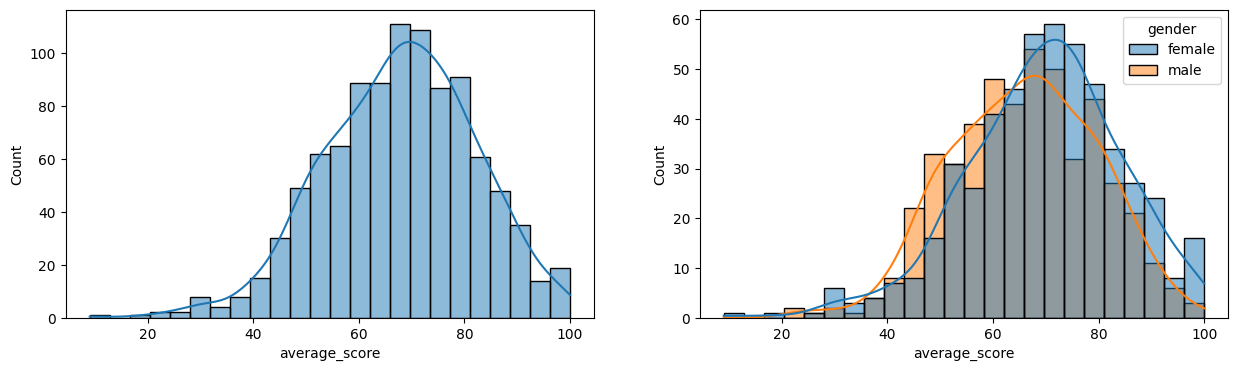

In [25]:
fig, ax = plt.subplots(1,2, figsize = (15,4))
plt.subplot(121)
sns.histplot(data=df, x = 'average_score', kde = True)
plt.subplot(122)
sns.histplot(data=df, x = 'average_score', kde = True, hue = 'gender')
plt.show()

> Insights
- Female students tends to slightly perform well in exams in comaprison to male students

### 2. Total score by gender

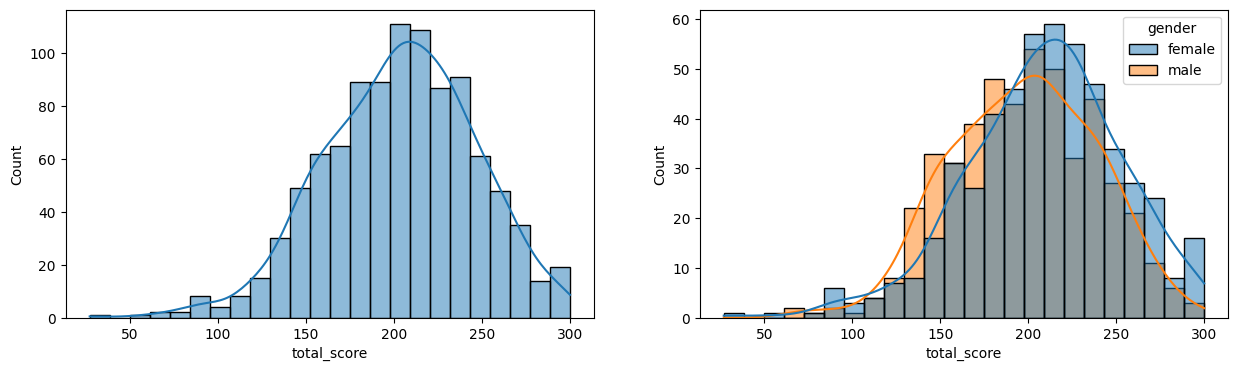

In [26]:
fig, ax = plt.subplots(1,2, figsize = (15,4))
plt.subplot(121)
sns.histplot(data=df, x = 'total_score', kde = True)
plt.subplot(122)
sns.histplot(data=df, x = 'total_score', kde = True, hue = 'gender')
plt.show()

> Insights 
- Female studenst are doing great in comparision to male students -> (High Total and High Avg)

### 3. Average score by gender and test_preparation_course

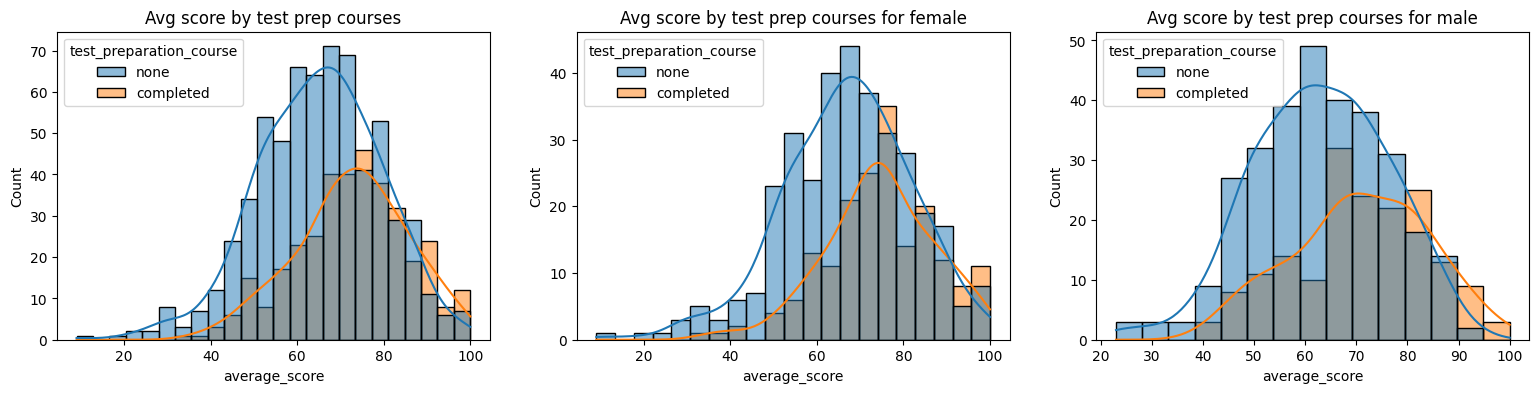

In [27]:
fig, ax = plt.subplots(1,3, figsize=(19,4))
plt.subplot(131)
plt.title('Avg score by test prep courses')
sns.histplot(data = df, x = 'average_score', hue = 'test_preparation_course', kde = True)
plt.subplot(132)
plt.title('Avg score by test prep courses for female')
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', hue = 'test_preparation_course', kde = True)
plt.subplot(133)
plt.title('Avg score by test prep courses for male')
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', hue = 'test_preparation_course', kde = True)
plt.show()

In [204]:
# df[df['gender'] == 'male'].groupby('test_preparation_course')['average_score'].mean()
# df[df['gender'] == 'female'].groupby('test_preparation_course')['average_score'].mean()
# df.groupby('test_preparation_course')['average_score'].mean()


> Insights
- Test preparation courses helps to score good marks in exam for both male and female

### 4. Avg score by gender and parental_level_of_education

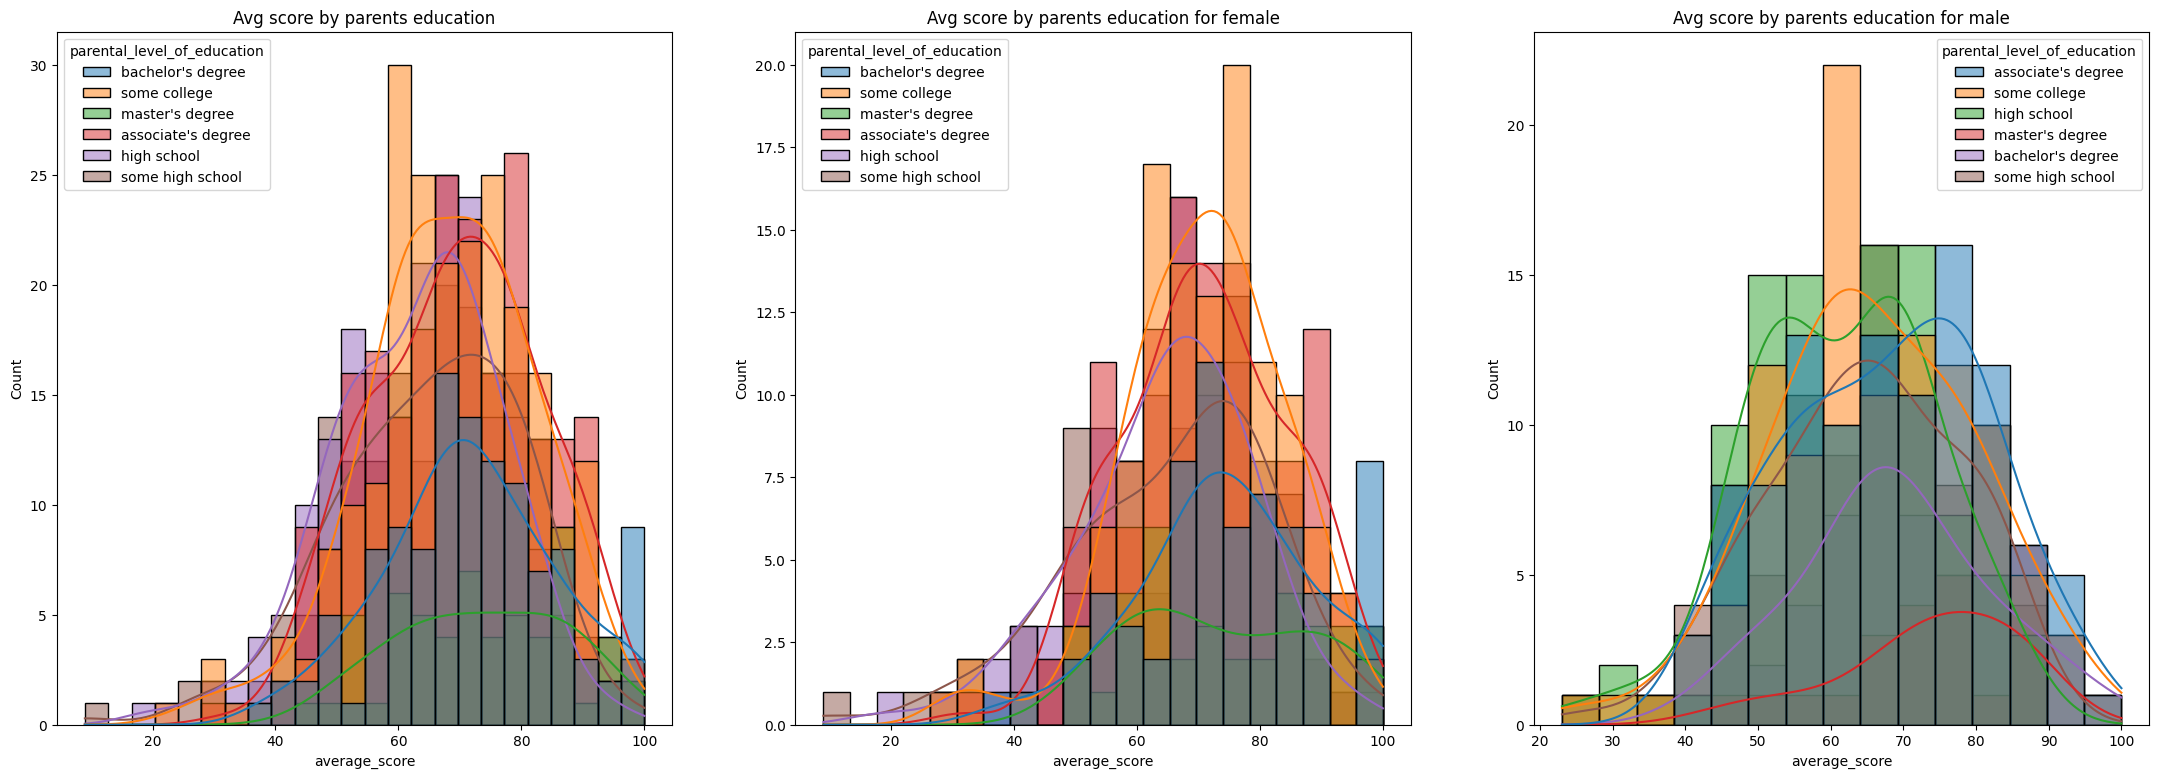

In [28]:
fig, ax = plt.subplots(1,3, figsize=(27,9))
plt.subplot(131)
plt.title('Avg score by parents education')
sns.histplot(data = df, x = 'average_score', hue = 'parental_level_of_education', kde = True)
plt.subplot(132)
plt.title('Avg score by parents education for female')
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', hue = 'parental_level_of_education', kde = True)
plt.subplot(133)
plt.title('Avg score by parents education for male')
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', hue = 'parental_level_of_education', kde = True)
plt.show()

In [29]:
# df.groupby('parental_level_of_education')['average_score'].mean()
# df[df['gender'] == 'female'].groupby('parental_level_of_education')['average_score'].mean()
# df[df['gender'] == 'male'].groupby('parental_level_of_education')['average_score'].mean()

> Insights
- In general parents having bachelor's or master's degree do help student perform well in exam
- For female, there is not much impact of parent's eductaion on their exams score
- For male, whose parents have masters degree, do perform well in exams -> (Avg ~ 73) 

### 5. Average Score by Lunch

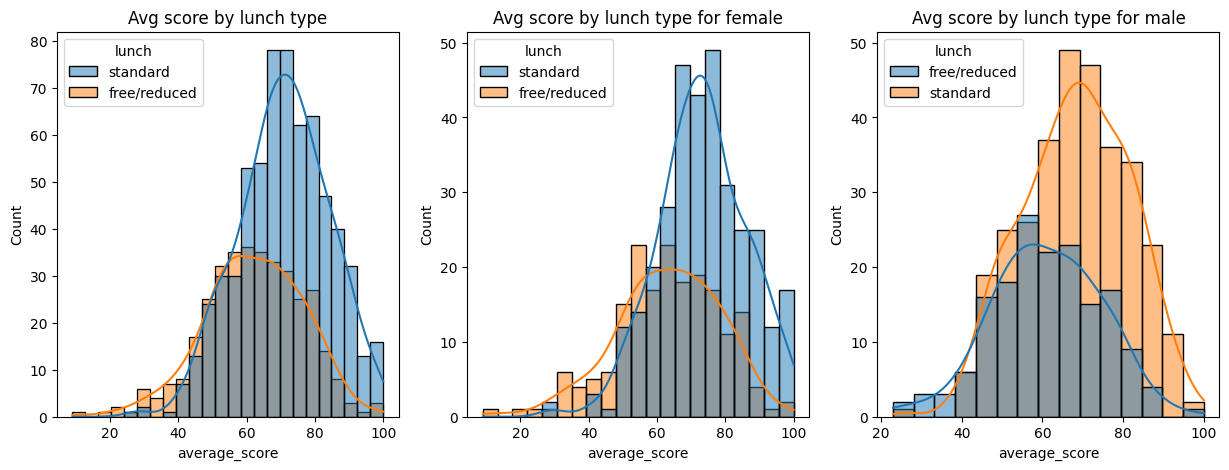

In [30]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
plt.subplot(131)
plt.title('Avg score by lunch type')
sns.histplot(data = df, x = 'average_score', hue = 'lunch', kde = True)
plt.subplot(132)
plt.title('Avg score by lunch type for female')
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', hue = 'lunch', kde = True)
plt.subplot(133)
plt.title('Avg score by lunch type for male')
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', hue = 'lunch', kde = True)
plt.show()

In [31]:
# df.groupby('lunch')['average_score'].mean()
# df[df['gender'] == 'female'].groupby('lunch')['average_score'].mean()
# df[df['gender'] == 'male'].groupby('lunch')['average_score'].mean()

> Insights
- Standard lunch helps students to perform well in the exams -> ( For all : Ingeneral, Male and Female )

### 6. Average Score by gender and race_ethnicity

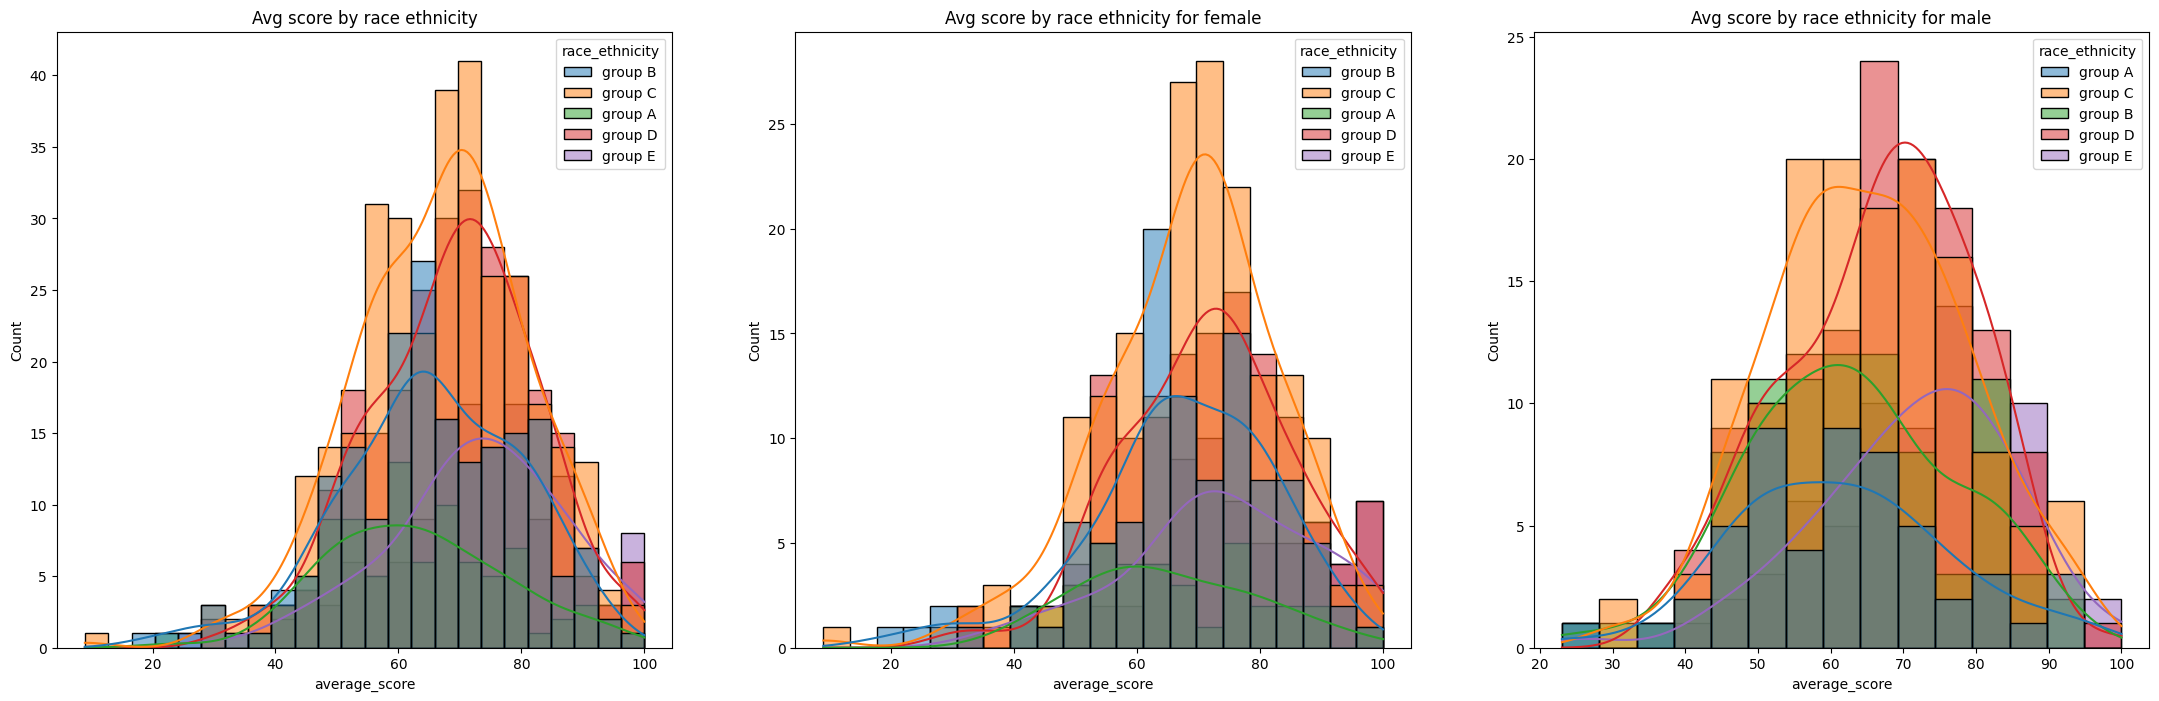

In [33]:
fig, ax = plt.subplots(1,3, figsize=(27,8))
plt.subplot(131)
plt.title('Avg score by race ethnicity')
sns.histplot(data = df, x = 'average_score', hue = 'race_ethnicity', kde = True)
plt.subplot(132)
plt.title('Avg score by race ethnicity for female')
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', hue = 'race_ethnicity', kde = True)
plt.subplot(133)
plt.title('Avg score by race ethnicity for male')
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', hue = 'race_ethnicity', kde = True)
plt.show()

In [34]:
# df.groupby('race_ethnicity')['average_score'].mean()
# df[df['gender'] == 'female'].groupby('race_ethnicity')['average_score'].mean()
# df[df['gender'] == 'male'].groupby('race_ethnicity')['average_score'].mean()

> Insights
- Groups A, B, and C tend to perform poorly in exams, regardless of whether they are male or female

### 7. Checking distribution and outliers for numerical columns 

In [66]:
numerical_col = [col for col in df.columns if df[col].dtype != 'O']
categorical_col = [col for col in df.columns if df[col].dtype == 'O']

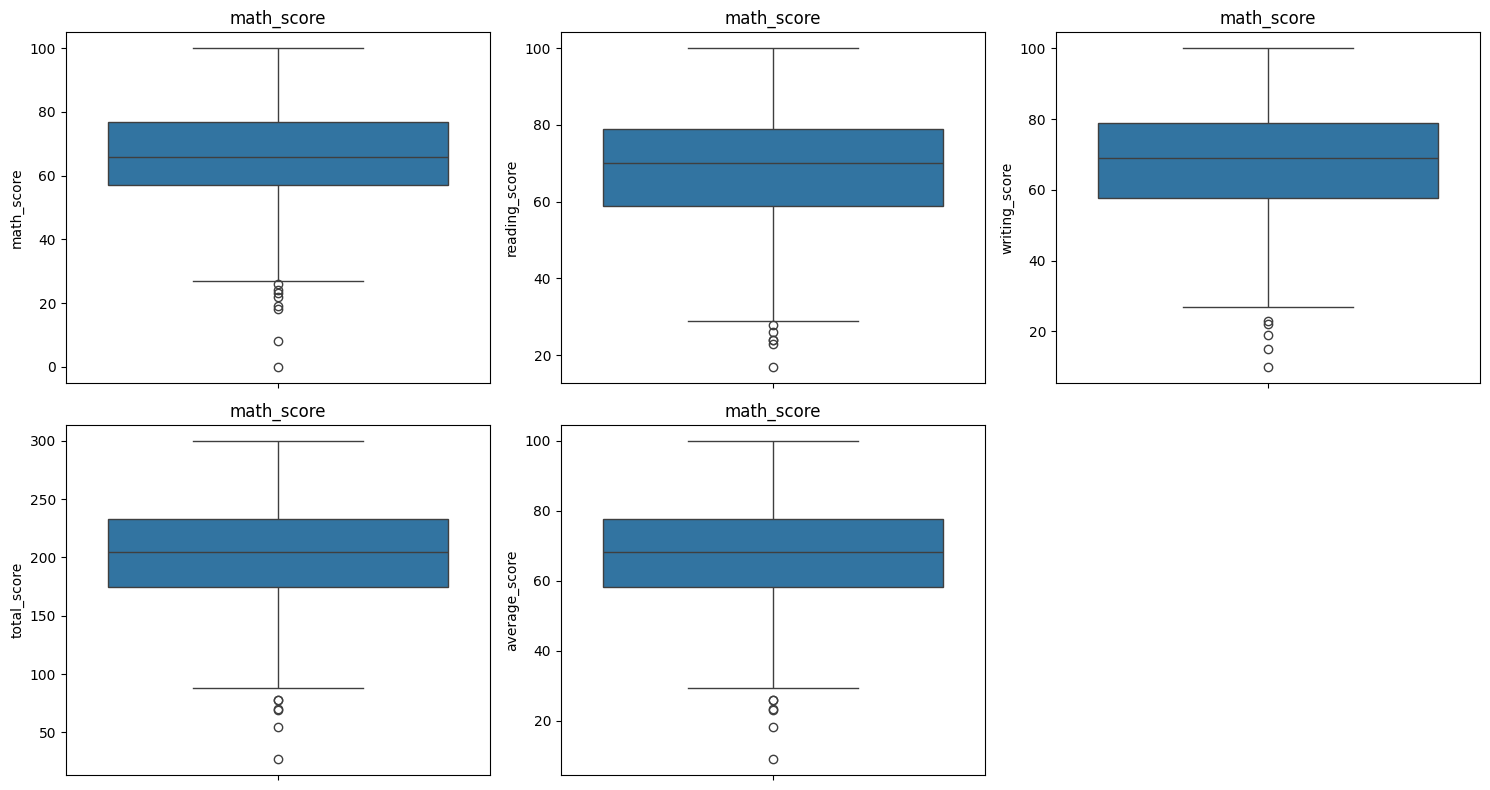

In [106]:
for i, cols in enumerate(numerical_col):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=cols)
    plt.title(col)

plt.tight_layout()
plt.show()

> Insights
- For maths, students usually score in between 55-75
- For reading and writing, students usually score in between 60-75

### 8. Check correlation for numerical columns

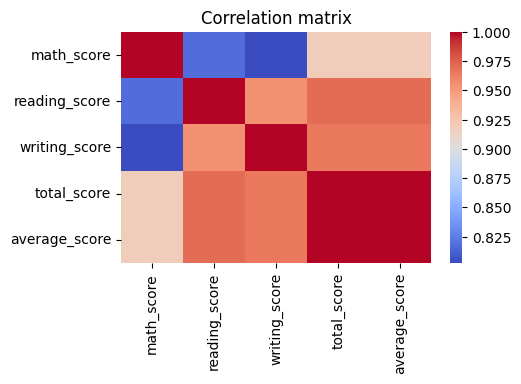

In [64]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

> Insights
- All numerical columns are highly positively correlated  

### 10. Checking distribution of categories using pie chart 

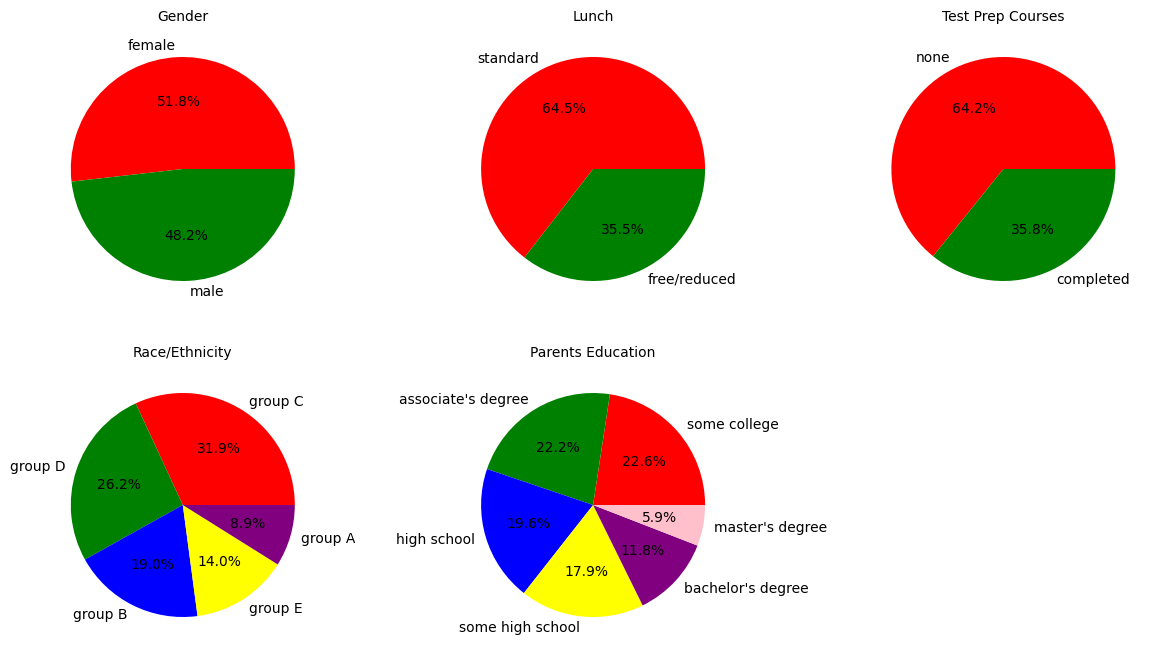

In [54]:
plt.figure(figsize = (15,8))

# Define the columns and their respective labels
columns = ['gender', 'lunch', 'test_preparation_course', 'race_ethnicity', 'parental_level_of_education']
titles = ['Gender', 'Lunch', 'Test Prep Courses', 'Race/Ethnicity', 'Parents Education']
colors = [
    ['red', 'green'],  # gender
    ['red', 'green'],  # lunch
    ['red', 'green'],  # test_preparation_course
    ['red', 'green', 'blue', 'yellow', 'purple'],  # race_ethnicity
    ['red', 'green', 'blue', 'yellow', 'purple', 'pink']  # parental_level_of_education
]

# Plot each pie chart
for i, (col, title, color) in enumerate(zip(columns, titles, colors)):
    plt.subplot(2, 3, i + 1)
    size = df[col].value_counts()
    labels = size.index
    plt.pie(size, labels=labels, colors=color, autopct='%1.1f%%')
    plt.title(title, fontsize=10)
    plt.axis('off')

plt.show()


> Insights
- Number of male and female is almost equal
- Majority of the students gets standard lunch
- Majority of the students haven't completed the courses before test
- Number of students are higher in Group C and D and low in Group A
- Majoriy of the sutdents parents have completed "Some College" or "Associate's Degree"

### 11. Count plot for categorical columns

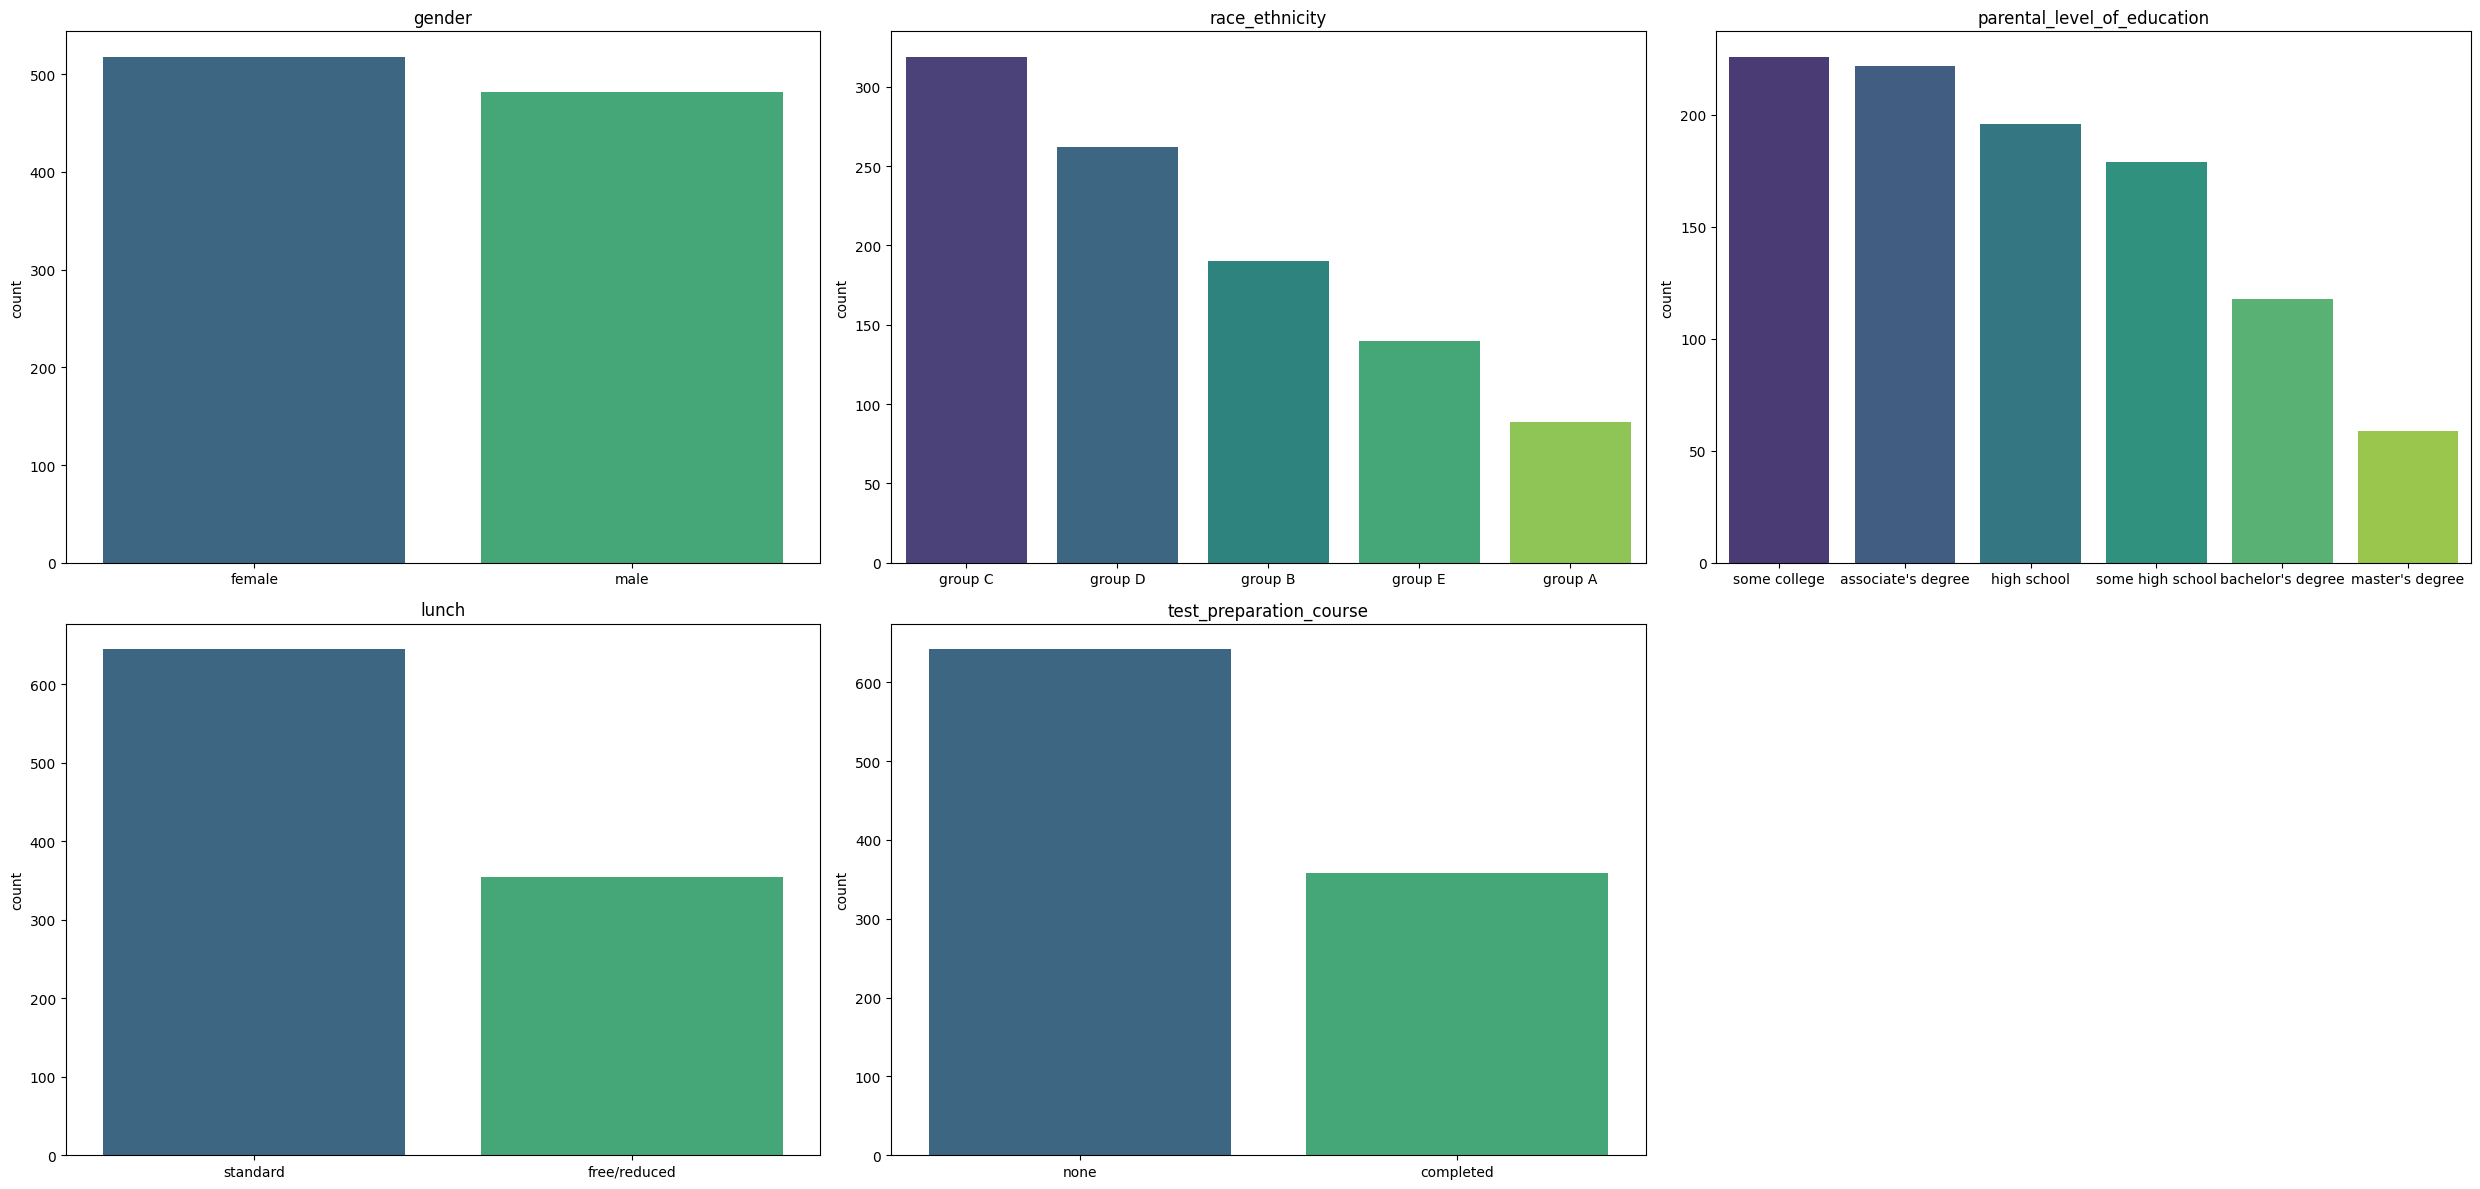

In [103]:
plt.figure(figsize=(25,12))
for i, col in enumerate(categorical_col):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df, x = df[col], stat= 'count' ,palette='viridis', order=df[col].value_counts(ascending=False).index)
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

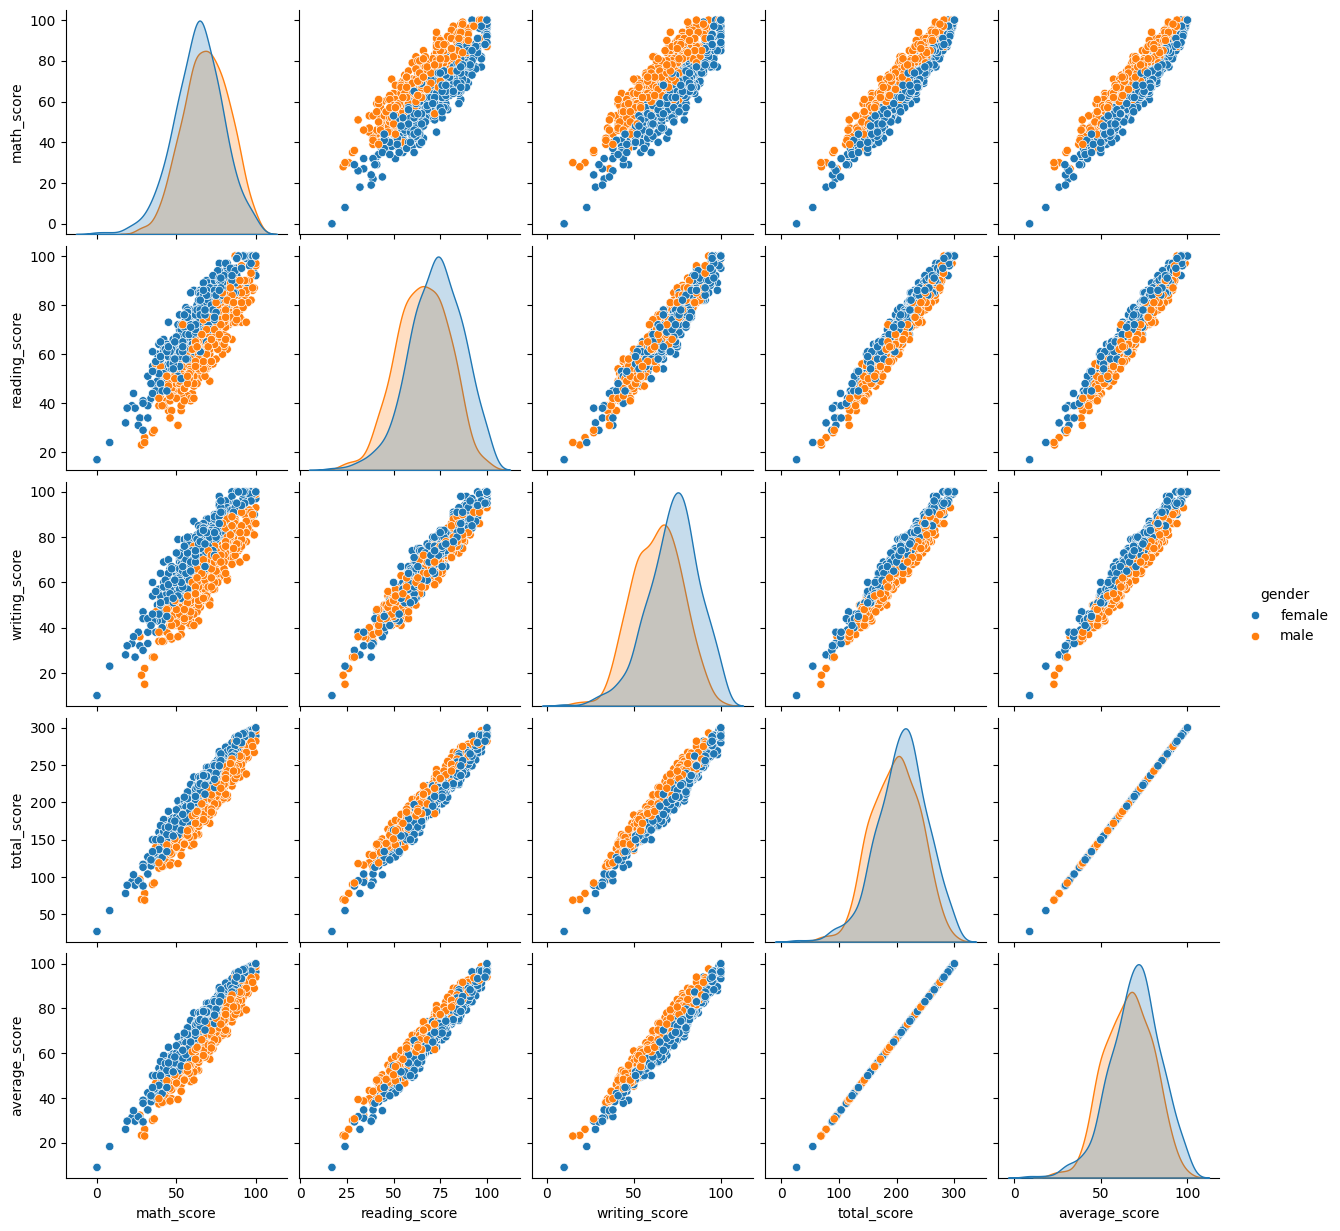

In [107]:
sns.pairplot(df,hue = 'gender')
plt.show()

> Insights
- From above graph it is clear that all the scores increases linearly for both gender

---

> Conclusions:
- Student's performane is related with gender, lunch, race, parental education, test course
- Female generally score good marks as compared to males (except for math)
- Students whose parenst have completed masters or bachelors generally perform well in exam
- All the scores are highly correlated to each other